<h1 align="center">Convex Optimization - 25756</h1>
<h4 align="center">Dr. yasaee</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">Amir Hossein Yari</h4>
<h5 align="center">99102507</h5>



## <font color='yellow'>1. Eigenvalues and Eigenvector</font>

In [ ]:
# add required packages
import numpy as np

# function that returns eigenvalues
def QR_eigenvalues(A, max_iterations=1000, tolerance=1e-10):
    n = A.shape[0]
    B = A.copy()
    Q, R = np.linalg.qr(A)
    eigenvector = np.eye(n)
    for i in range(max_iterations):
        A = np.dot(R, Q)
        Q, R = np.linalg.qr(A)
        eigenvalues = np.diag(A)
        Q1, R1 = np.linalg.qr(B @ eigenvector)
        eigenvector = Q1
        if np.allclose(np.triu(A, 1), np.zeros((n, n)), atol=tolerance):
            break
    #sorting eigenvalues and eigenvector
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvector = eigenvector[:,idx]
    return eigenvalues, eigenvector


# Example usage
n = 5
A = np.random.rand(n, n)
A = (A + A.T)/2
MyEigenvalues, MyEigvector = QR_eigenvalues(A)
print("eigenvalues(my function) :")
print(MyEigenvalues)
print("eigenvector(my function) :")
print(MyEigvector)
# We compare our results with the official numpy algorithm
eigval, eigvec = np.linalg.eig(A)
#sorting eigenvalues and eigenvector
idx = eigval.argsort()[::-1]   
eigval = eigval[idx]
eigvec = eigvec[:,idx]
print("eigenvalues(python function) :")
print(eigval)
print("eigenvector(python function) :")
print(eigvec)

eigenvalues(my function) :
[ 2.47044697  0.81676024  0.38458693 -0.23365079 -0.69510897]
eigenvector(my function) :
[[-0.51568985  0.15922626  0.54185255 -0.35687312  0.53642182]
 [-0.3984376  -0.84646221  0.15195517  0.3086582  -0.07993093]
 [-0.44605926  0.15845019  0.06459051 -0.37838343 -0.79282956]
 [-0.31885147 -0.16633959 -0.79402504 -0.40563116  0.27504995]
 [-0.52409572  0.45318143 -0.220585    0.6853182   0.04039164]]
eigenvalues(python function) :
[ 2.47044697  0.81676024  0.38458693 -0.23365079 -0.69510897]
eigenvector(python function) :
[[ 0.51568985  0.15922626 -0.54185255 -0.35687312  0.53642182]
 [ 0.3984376  -0.84646221 -0.15195517  0.3086582  -0.07993093]
 [ 0.44605926  0.15845019 -0.06459051 -0.37838343 -0.79282956]
 [ 0.31885147 -0.16633959  0.79402504 -0.40563116  0.27504995]
 [ 0.52409572  0.45318143  0.220585    0.6853182   0.04039164]]


## <font color='yellow'>2. SVD and Image Processing</font>

<font color='yellow'>1. Image compression</font>

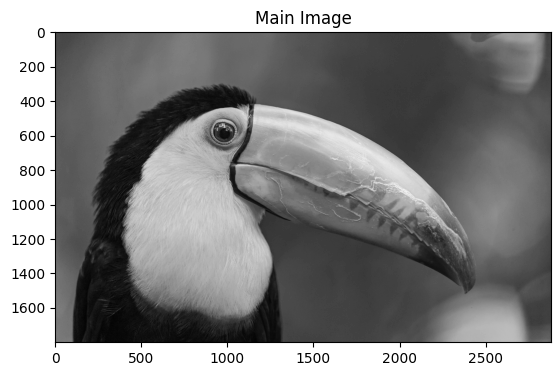

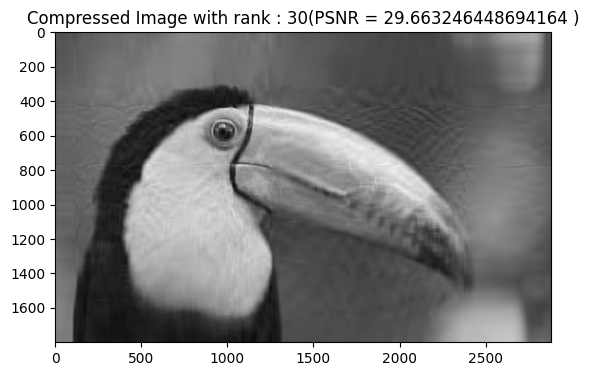

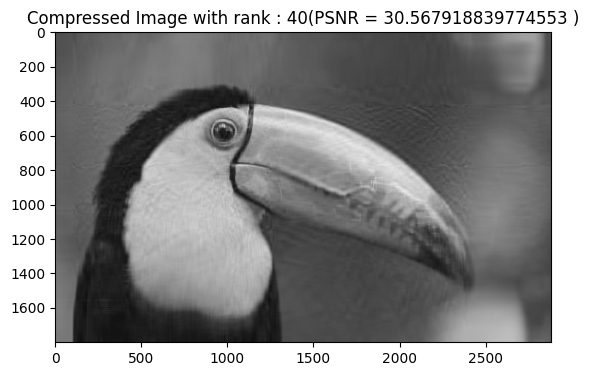

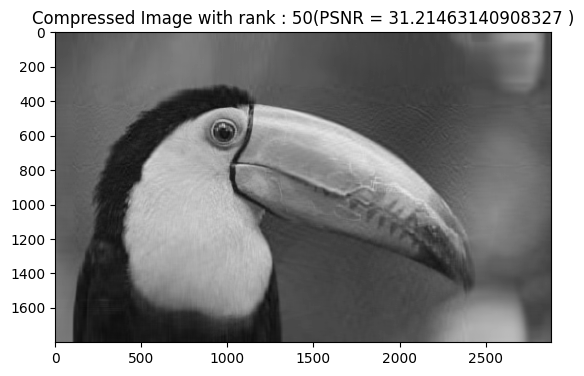

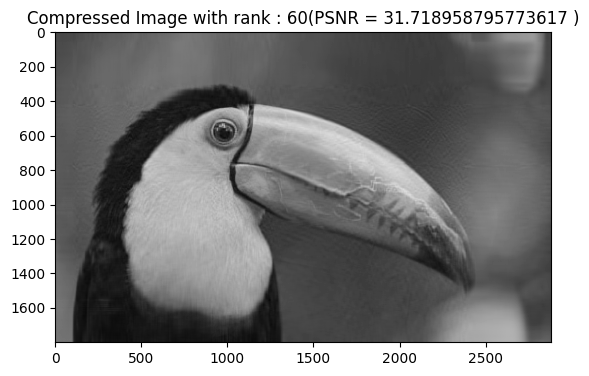

In [56]:
# add required packages
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

# PSNR function
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# compressed image function 
def compress_img(original_image, rank, plot):
    # perform SVD
    U, S, V = np.linalg.svd(original_image)
    # compress
    compressed_image = np.dot(U[:,:rank],np.dot(np.diag(S[:rank]),V[:rank,:]))
    # calculate psnr
    psnr = PSNR(gray_img, compressed_image)
    # plotting
    if plot == 1:
        plt.figure()
        plt.imshow(compressed_image, cmap='gray')
        plt.title('Compressed Image with rank : '+ str(rank) + '(PSNR = '+str(psnr)+' )')
    return compressed_image,psnr

# load image
img = mpimg.imread('q2_pic.jpg')
gray_img = arr = np.asarray(Image.open('q2_pic.jpg').convert("L"))
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.title('Main Image')


# set rank of the approximation
rank = [30, 40, 50, 60]

# reconstruct image with low rank approximation
for i in rank:
    cmp_img, psnr = compress_img(gray_img, i, 1)

[29.663246448694164, 30.567918839774553, 31.21463140908327, 31.718958795773617, 32.14996355238846, 32.537579936888086, 32.89328682801048]


Text(0, 0.5, 'PSNR')

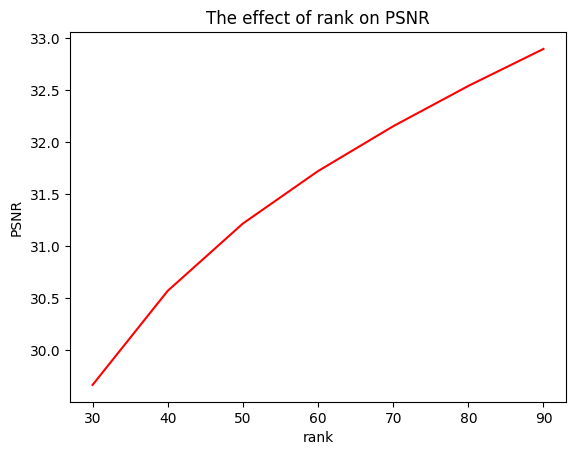

In [4]:
# Checking the effect of rank on psnr
psnr_list = []
for i in range(30,100,10):
    cmp_img, psnr = compress_img(gray_img, i, 0)
    psnr_list.append(psnr)

print(psnr_list)
# plotting
plt.figure()
plt.plot(range(30,100,10), psnr_list, 'r')
plt.title('The effect of rank on PSNR')
plt.xlabel('rank')
plt.ylabel('PSNR')

[21.98648597728544, 23.472352756276557, 24.729502391651632, 25.831764631247303, 26.828708262535827, 27.778712542784916, 28.70221377761494]


Text(0, 0.5, 'PSNR')

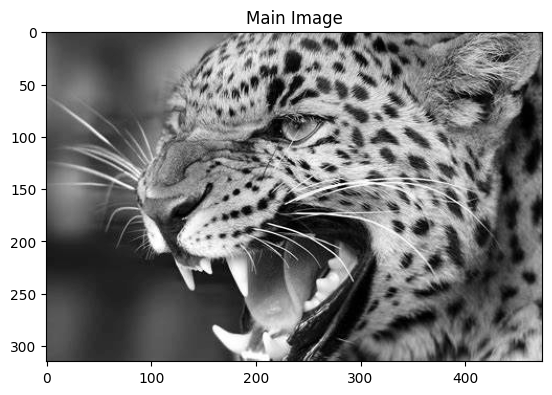

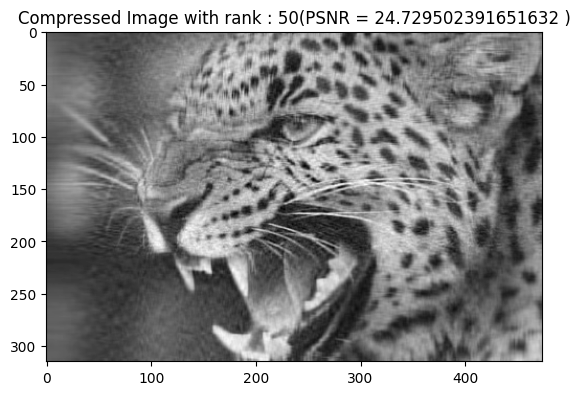

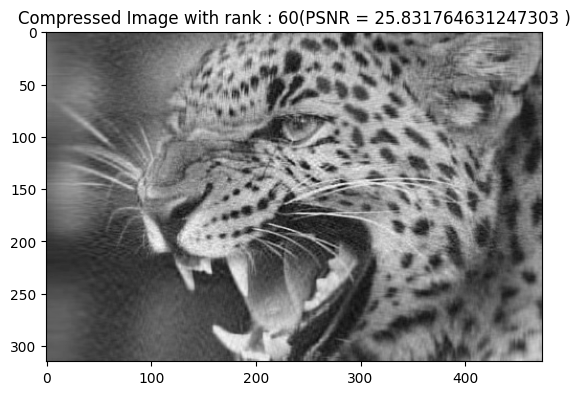

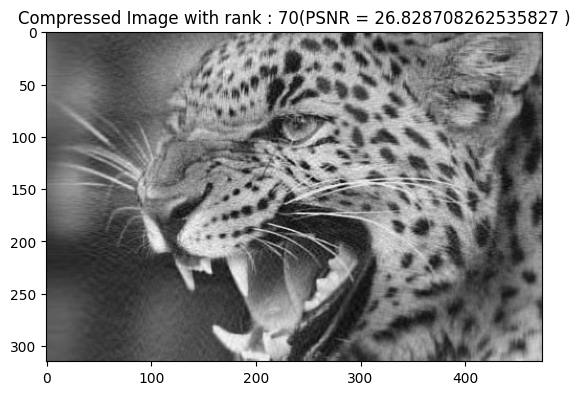

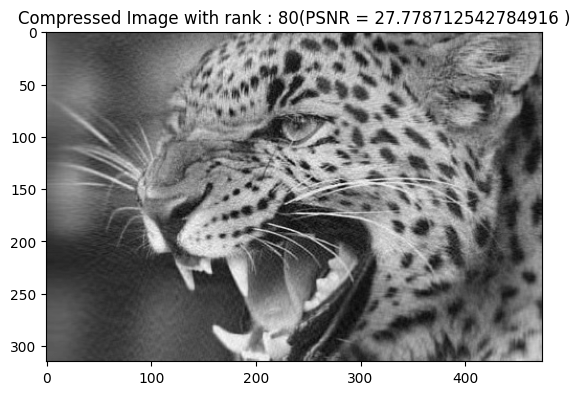

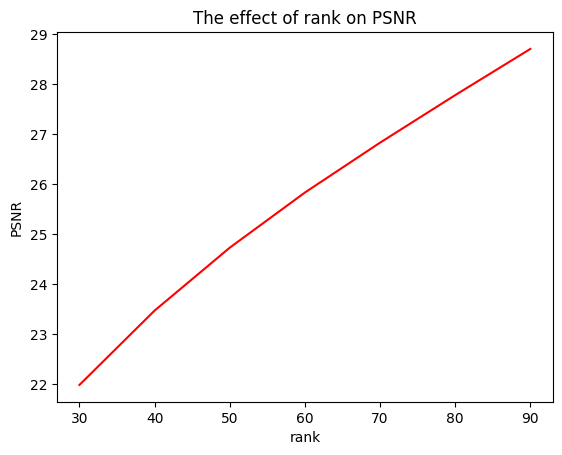

In [5]:
# Seccond image
# load image
img = mpimg.imread('sec_img.jpg')
gray_img = arr = np.asarray(Image.open('sec_img.jpg').convert("L"))
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.title('Main Image')


# set rank of the approximation
rank = [50, 60, 70, 80]

# reconstruct image with low rank approximation
for i in rank:
    cmp_img, psnr = compress_img(gray_img, i, 1)

# Checking the effect of rank on psnr
psnr_list = []
for i in range(30,100,10):
    cmp_img, psnr = compress_img(gray_img, i, 0)
    psnr_list.append(psnr)

print(psnr_list)
# plotting
plt.figure()
plt.plot(range(30,100,10), psnr_list, 'r')
plt.title('The effect of rank on PSNR')
plt.xlabel('rank')
plt.ylabel('PSNR')

[23.653766885954298, 24.04867859666532, 24.43017541608143, 24.804178138243437, 25.169501896599854, 25.52682985794576, 25.877267780095142, 26.22355362221556]


Text(0, 0.5, 'PSNR')

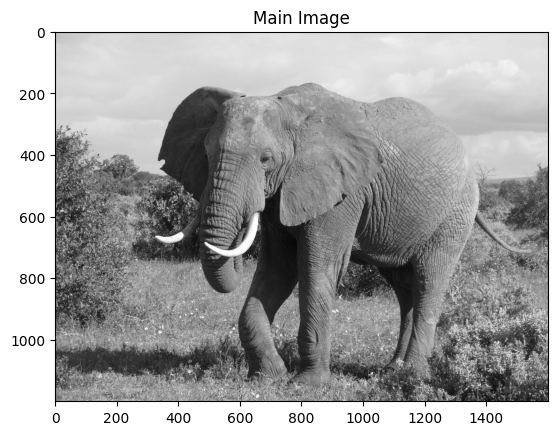

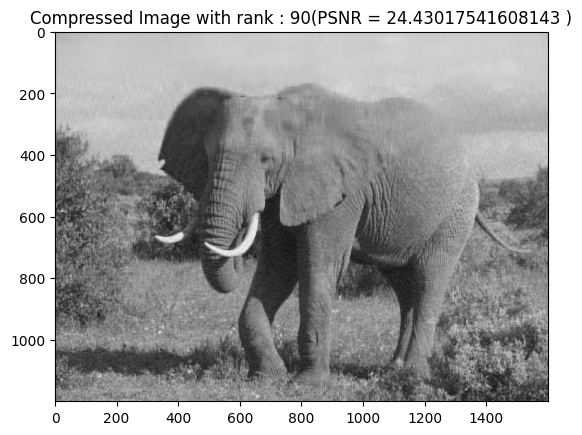

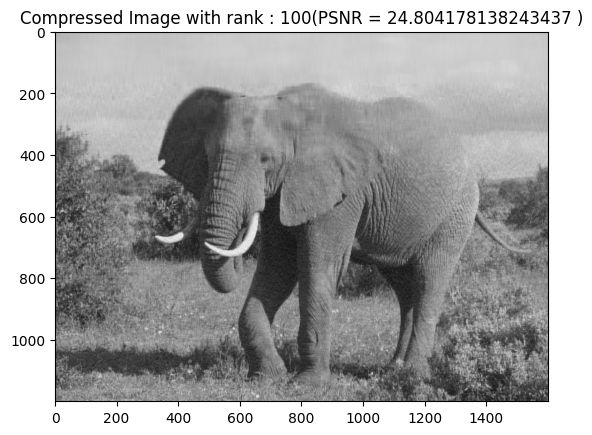

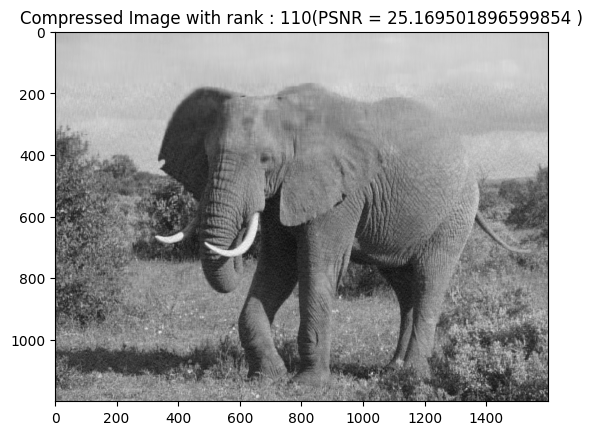

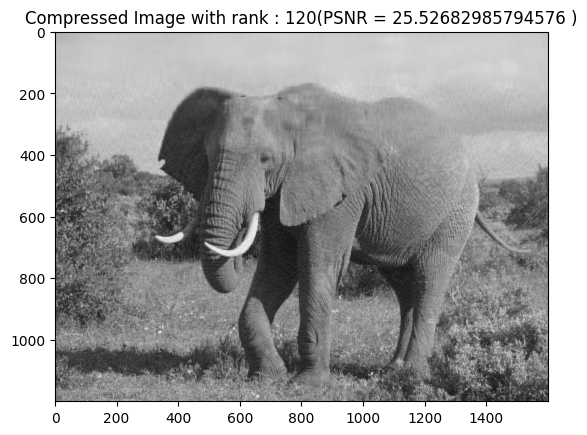

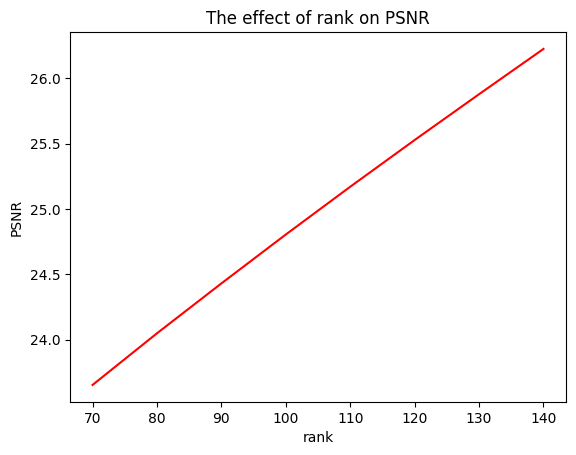

In [6]:
# Third image
# load image
img = mpimg.imread('third_img.jpg')
gray_img = arr = np.asarray(Image.open('third_img.jpg').convert("L"))
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.title('Main Image')


# set rank of the approximation
rank = [90, 100, 110, 120]

# reconstruct image with low rank approximation
for i in rank:
    cmp_img, psnr = compress_img(gray_img, i, 1)

# Checking the effect of rank on psnr
psnr_list = []
for i in range(70,150,10):
    cmp_img, psnr = compress_img(gray_img, i, 0)
    psnr_list.append(psnr)

print(psnr_list)
# plotting
plt.figure()
plt.plot(range(70,150,10), psnr_list, 'r')
plt.title('The effect of rank on PSNR')
plt.xlabel('rank')
plt.ylabel('PSNR')

<font color='yellow'>2. Delete noise</font>

PSNR of gaussian noise = 15.696857429512058
PSNR of S&P noise = 15.187465958232714


C:\Users\Salam\AppData\Local\Temp\ipykernel_23380\1893122014.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


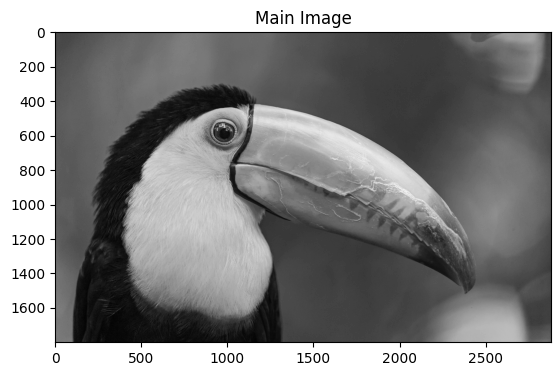

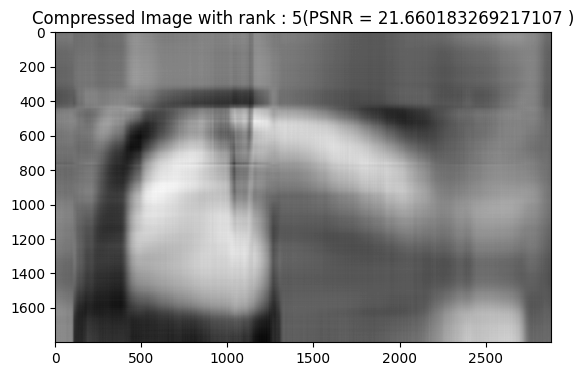

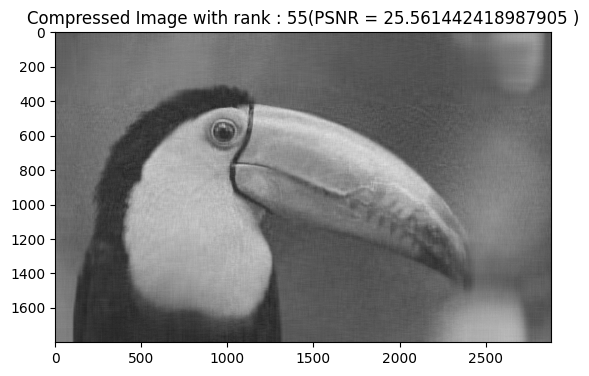

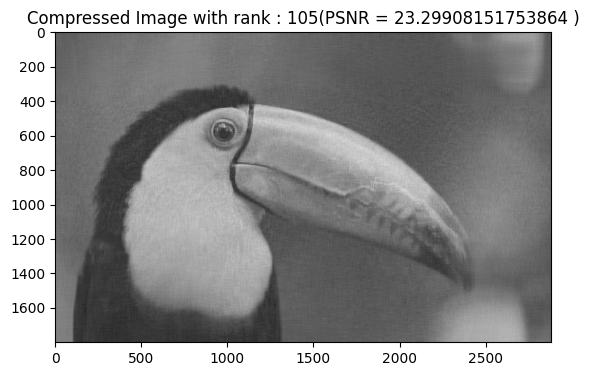

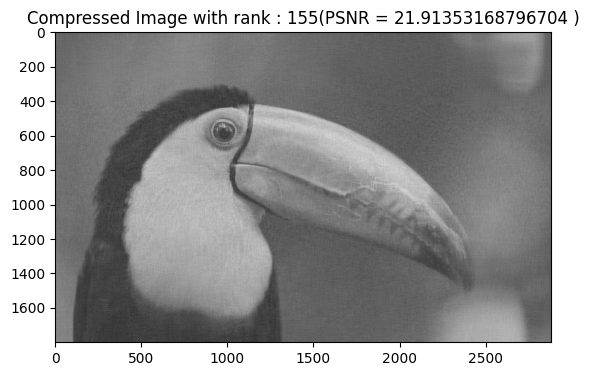

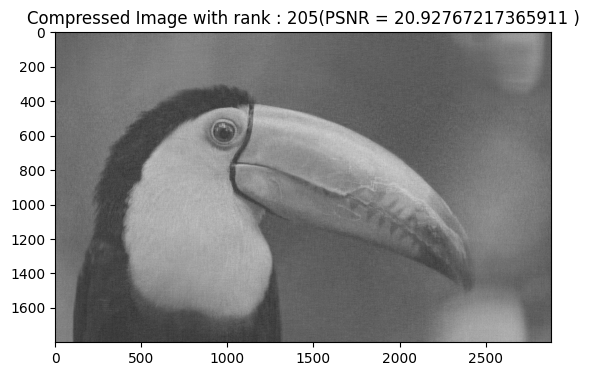

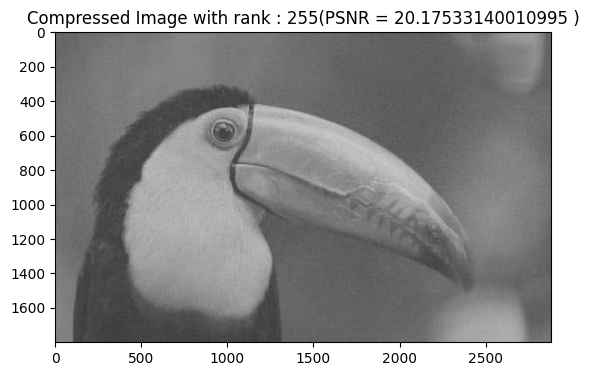

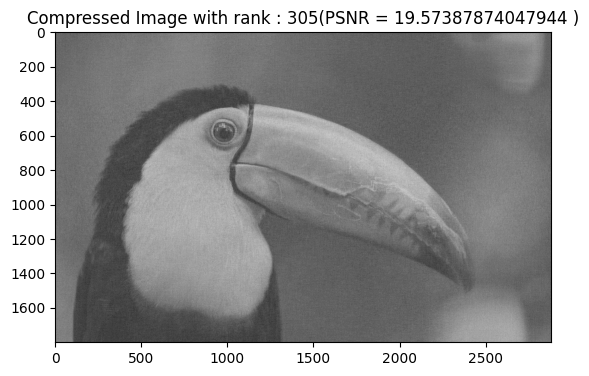

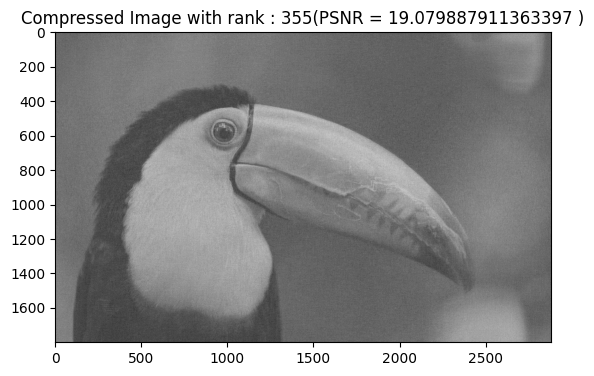

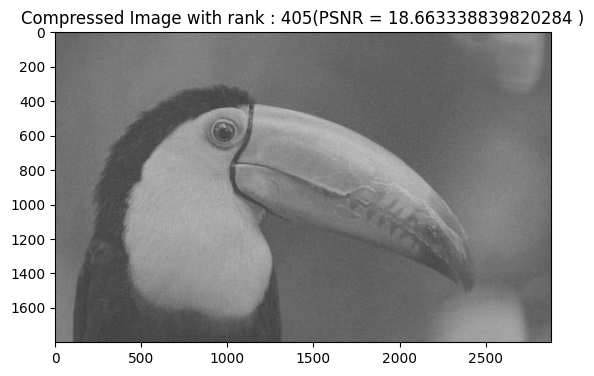

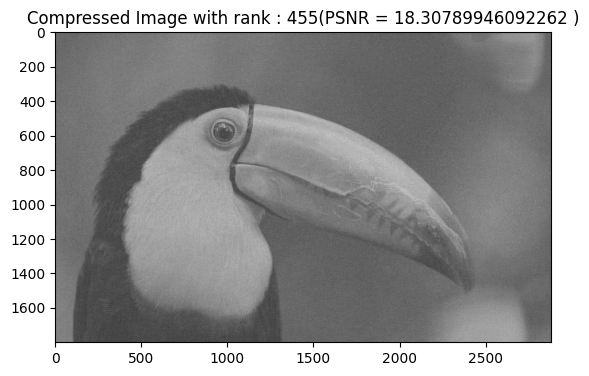

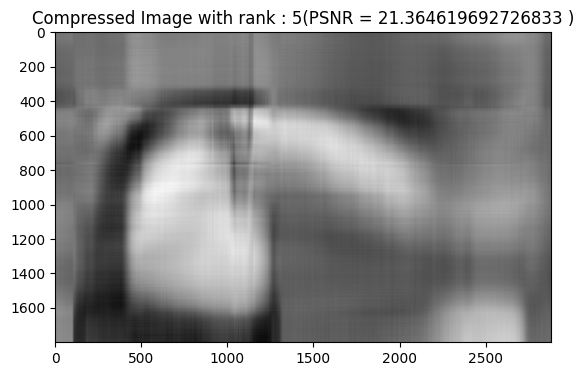

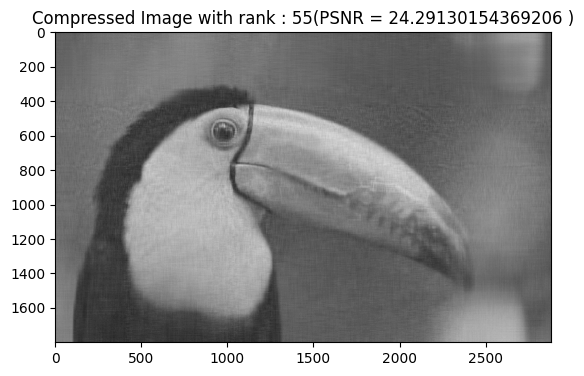

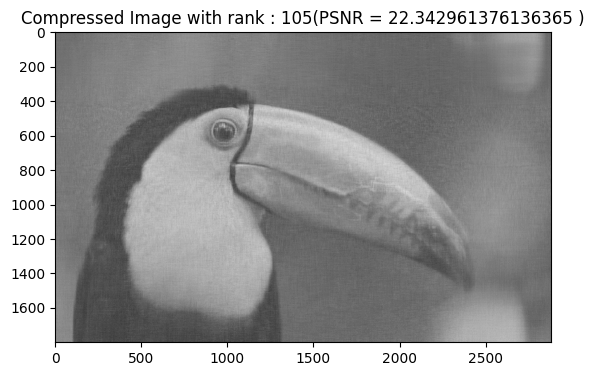

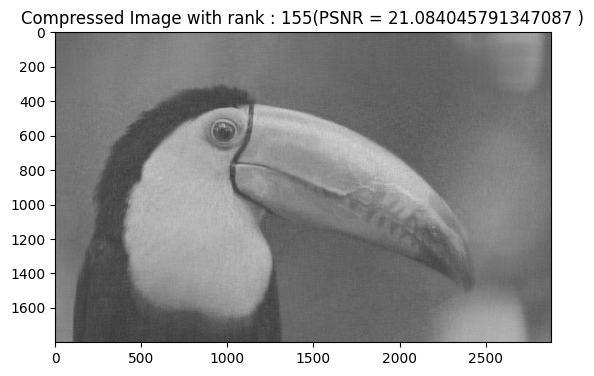

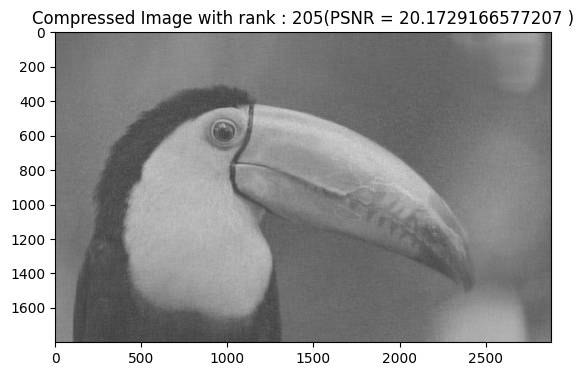

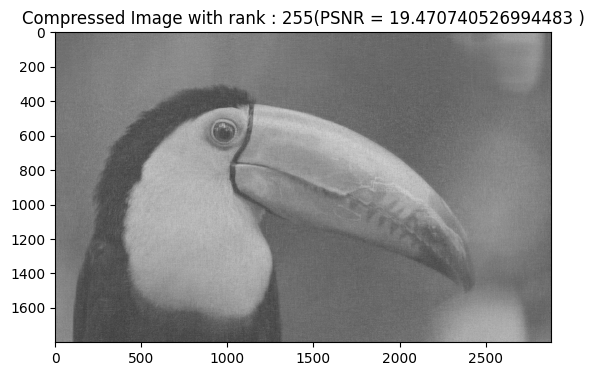

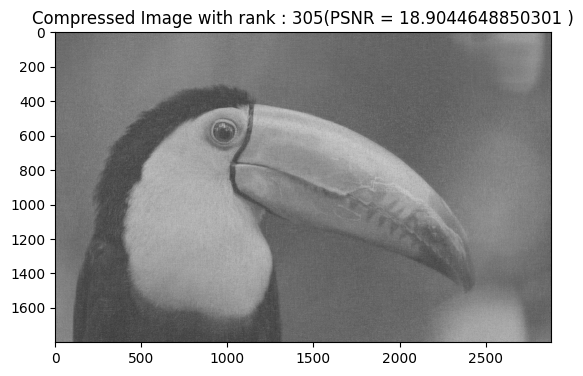

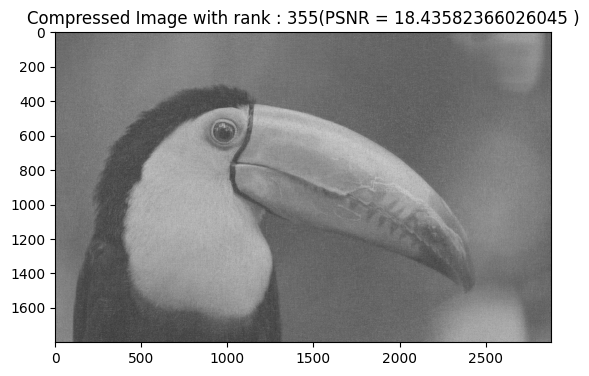

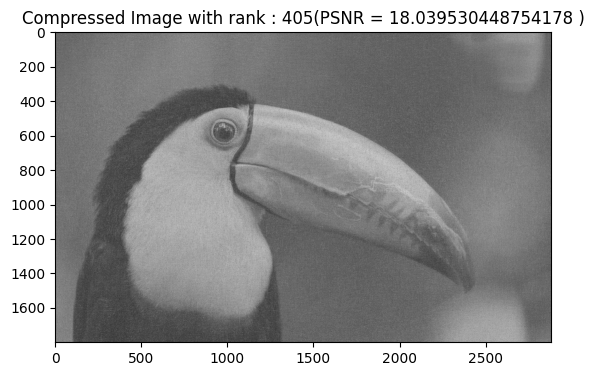

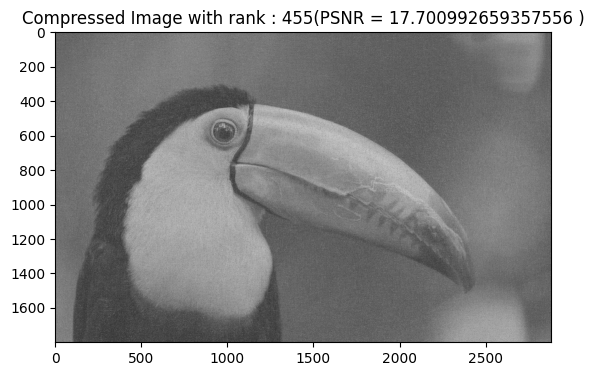

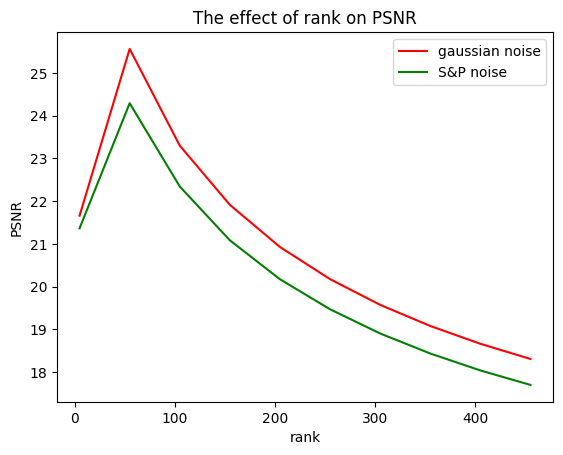

In [55]:
# add salt and pepper noise function
def SaltAndPepper(image, prob):
    output = np.zeros(image.shape)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# load image
img = mpimg.imread('q2_pic.jpg')
gray_img = arr = np.asarray(Image.open('q2_pic.jpg').convert("L"))
plt.figure()
plt.imshow(gray_img, cmap='gray')
plt.title('Main Image')

# Add Gaussian noise
mean = 0
variance = 1750
sigma = np.sqrt(variance)
gauss_noise = np.random.normal(mean, sigma, (gray_img.shape[0],gray_img.shape[1]))
gauss_noise = gauss_noise.reshape(gray_img.shape)
gauss_noise_img = gray_img + gauss_noise

# Add salt and pepper noise
SP_img = SaltAndPepper(gray_img,0.05)

# calculate PSNR
gauss_psnr = PSNR(gray_img, gauss_noise_img)
SP_psnr = PSNR(gray_img, SP_img)
print('PSNR of gaussian noise = '+ str(gauss_psnr))
print('PSNR of S&P noise = '+ str(SP_psnr))

# Checking the effect of rank on psnr in gaussian noise image
gauss_psnr_list = []
for i in range(5,500,50):
    cmp_img, psnr = compress_img(gauss_noise_img, i, 1)
    gauss_psnr_list.append(psnr)

# Checking the effect of rank on psnr in S&P noise image
SP_psnr_list = []
for i in range(5,500,50):
    cmp_img, psnr = compress_img(SP_img, i, 1)
    SP_psnr_list.append(psnr)

# plotting
plt.figure()
plt.plot(range(5,500,50), gauss_psnr_list, 'r', label='gaussian noise')
plt.plot(range(5,500,50), SP_psnr_list, 'g', label='S&P noise')
plt.title('The effect of rank on PSNR')
plt.xlabel('rank')
plt.ylabel('PSNR')
plt.legend()

## <font color='yellow'>3. Dimensional reduction of data with PCA method</font>

<class 'pandas.core.frame.DataFrame'>


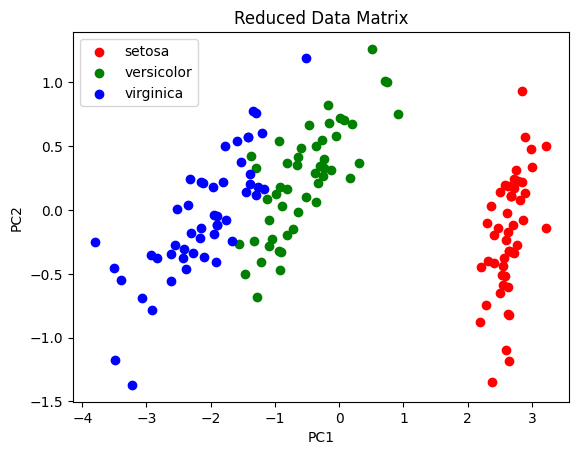

In [1]:
# add required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data matrix X
df = pd.read_csv('iris.csv')
X = df[df.columns[0:4]]
label = df.iloc[:, -1].values

#mean centering
X_meaned = X - np.mean(X, axis = 0)

#covariance matrix
cov_matrix = np.cov(X_meaned , rowvar = False)

#eigenvectors and eigenvalues
eigen_vectors, eigen_values, V = np.linalg.svd(cov_matrix)

#sorting the eigenvectors based on eigenvalues
eigen_values_sorted_idx = np.argsort(eigen_values)[::-1][:2]
projection_matrix = eigen_vectors[:,eigen_values_sorted_idx]

#projecting the data
X_reduced = X_meaned.dot(projection_matrix)
print(type(X_reduced))

# Plot the reduced data matrix
plt.figure
for i in range(150):
    if label[i] == 'setosa':
        plt.scatter(X_reduced[0][i], X_reduced[1][i], c='r', label='setosa')
    elif label[i] == 'versicolor':
        plt.scatter(X_reduced[0][i], X_reduced[1][i], c='g', label='versicolor')
    elif label[i] == 'virginica':
        plt.scatter(X_reduced[0][i], X_reduced[1][i], c='b', label='virginica')
plt.title("Reduced Data Matrix")
plt.xlabel("PC1")
plt.ylabel("PC2")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()